In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

from simcodes.fitters import ExtendedLS
from gatspy.periodic import LombScargleMultiband
from KuiperMetric import KuiperVS

In [2]:
# Grab the current baseline file. Should have been downloaded with rubin_sim. 
# Can grab lots of different sims from: http://astro-lsst-01.astro.washington.edu:8081/
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
conn = maf.db.OpsimDatabase(baseline_file)
outDir = 'temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [3]:
baseline_file

'/home/alex/rubin_sim_data/sim_baseline/baseline_v2.0_10yrs.db'

In [4]:
# Same for rolling cadence
rollDbFile = '/home/alex/rubin_sim_data/rolling_all_sky_ns2_rw0.9_v2.0_10yrs.db'
rollName = os.path.split(rollDbFile)[-1].replace('.db', '')
rollDb = maf.db.OpsimDatabase(rollDbFile)
resultsDbRoll = maf.db.ResultsDb(outDir=outDir)
print(rollName)

rolling_all_sky_ns2_rw0.9_v2.0_10yrs


In [5]:
# Test quality of period determination
### Integrating with period determination
library=pd.read_csv('simcodes/ZTF_VS_all_formatted.csv',index_col=0)
library['unique_filts_']=library['unique_filts_'].apply(lambda x:list(map(eval,x[1:-1].split(' '))))
library['ymean_by_filt_']=library['ymean_by_filt_'].apply(lambda x:np.array([float(k) for k in x[1:-1].split(' ') if len(k)>0]))
library['theta']=library['theta'].apply(lambda x:np.array([float(k) for k in x[1:-1].split(' ') if len(k)>0]))

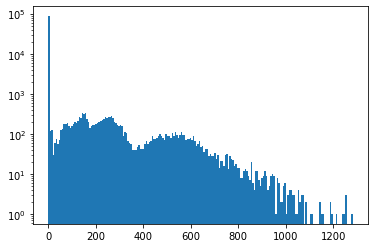

In [6]:
n,bins,patches=plt.hist(library['_best_period'],bins=200,log=True)

In [7]:
print(len(library))
print(len(library[library['_best_period']<=bins[1]]))

100260
86542


13523


<AxesSubplot:>

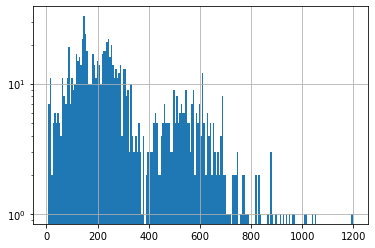

In [8]:
libCut=library[library['_best_period']>=bins[1]].append(library[library['_best_period']>=bins[1]].sample(200))
libCut=libCut.drop_duplicates(subset='_best_period')
print(len(libCut))
libCut=libCut.sample(1000)
libCut['_best_period'].hist(bins=200,log=True)

In [9]:
# Set range of periods for which we're gonna build the maps
perStep=100
numPoints=500 # This takes a lot of memory, so on 16 GB RAM PC numPoints<150 is recommended
#periods=np.round(np.linspace(perStep, numPoints*perStep,numPoints,dtype='float'),3) # equal step periods
"""
# Random periods
totalObsLength=365*5
periods=np.random.rand(numPoints)*totalObsLength
periods=periods.round(2)
"""

#Periods based on the LC library
periods=np.array(libCut['_best_period'])
periods.sort()

In [10]:
bundleList=[]
bundleListRoll=[]
ra = [0.]
dec = [-20]
sql = ''
slicer = maf.slicers.UserPointsSlicer(ra=ra, dec=dec)


for p in periods:
    metric = KuiperVS(period=p)
    bundleList.append(maf.MetricBundle(metric, slicer, sql, runName='KuiperVSTest_'+str(p)))
    bundleListRoll.append(maf.MetricBundle(metric, slicer, sql, runName='RollKuiperVSTest_'+str(p)))

In [11]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database observations with no constraint for columns ['fieldRA', 'rotSkyPos', 'fieldDec', 'observationStartMJD'].
Found 2086980 visits
Running:  ['KuiperVSTest_7_264040419209452_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['KuiperVSTest_9_046256187980834_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['KuiperVSTest_9_879500026151035_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['KuiperVSTest_10_528256149026056_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['KuiperVSTest_11_213659021854632_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['KuiperVSTest_11_213829666020056_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['KuiperVSTest_13_011312438449194_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['KuiperVSTest_13_77876025622654_KuiperVS_observationStartMJD_USER']
Completed metric 

KeyboardInterrupt: 

In [38]:
bdRoll = maf.metricBundles.makeBundlesDictFromList(bundleListRoll)
bgRoll = maf.metricBundles.MetricBundleGroup(bdRoll, rollDb, outDir=outDir, resultsDb=resultsDbRoll)
bgRoll.runAll()

Querying database observations with no constraint for columns ['fieldDec', 'observationStartMJD', 'fieldRA', 'rotSkyPos'].
Found 2088105 visits
Running:  ['RollKuiperVSTest_6_9619744818864975_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_7_396867426011614_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_8_2295737593928_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_9_853288998864247_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_10_091267486510167_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_10_636099732859272_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_10_725425094438378_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_13_011312438449194_KuiperVS_observationSt

Completed metric generation.
Running:  ['RollKuiperVSTest_75_02950651893987_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_76_29562040349222_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_77_35862365345292_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_77_461029347639_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_77_78370729180044_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_78_5820202771956_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_79_01958847835391_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_79_18835621112466_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_79_51956194892357_KuiperVS_observationStartMJD_US

Completed metric generation.
Running:  ['RollKuiperVSTest_116_23776042132002_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_117_44967554500346_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_118_15745293996592_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_118_20582800897724_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_118_25809265599386_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_118_33199576368368_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_118_58979007958514_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_119_68754676899388_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_119_98588415385214_KuiperVS_observatio

Completed metric generation.
Running:  ['RollKuiperVSTest_142_90483660619347_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_143_03283037276307_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_143_3169131963768_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_143_3839588711756_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_143_97740281840785_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_144_15957926709777_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_144_23435241565184_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_144_38063932095724_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_144_58595732555054_KuiperVS_observationS

Completed metric generation.
Running:  ['RollKuiperVSTest_162_49938738880996_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_163_63547750842986_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_163_96774891512442_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_164_1006020843731_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_165_60539649654544_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_166_90912233439428_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_168_43281879343994_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_169_40691724461445_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_169_84311712213673_KuiperVS_observation

Completed metric generation.
Running:  ['RollKuiperVSTest_208_0200746243976_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_208_61534399451676_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_208_81692055122576_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_209_0862535401244_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_209_9248842014269_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_210_53966438004292_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_210_7075976920161_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_212_61180451528003_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_213_78677334252427_KuiperVS_observationSta

Completed metric generation.
Running:  ['RollKuiperVSTest_239_7419979331661_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_239_80421047437892_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_239_96750081699045_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_240_83904846221677_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_240_88321801891516_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_240_99115540959357_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_241_30406891403047_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_241_3289712306515_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_241_36722097630476_KuiperVS_observationS

Completed metric generation.
Running:  ['RollKuiperVSTest_261_1294688356144_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_261_21896058943594_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_261_2431115675228_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_261_63239504836906_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_261_7008809396743_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_262_14512589213933_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_262_7496925793385_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_263_5148310242341_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_263_7692309193028_KuiperVS_observationStart

Completed metric generation.
Running:  ['RollKuiperVSTest_288_192280313869_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_288_3656038044909_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_290_7606705133486_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_291_07841668030284_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_292_3736913802482_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_292_7045174310449_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_293_6705537490026_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_293_9356759903531_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_294_6001070776811_KuiperVS_observationStartMJD

Completed metric generation.
Running:  ['RollKuiperVSTest_336_55499273868674_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_336_79435562573286_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_337_888982259073_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_340_12350487199734_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_342_35283026471814_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_346_0240291006012_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_351_21147639271635_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_352_2687691423713_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_356_182650432867_KuiperVS_observationStart

Completed metric generation.
Running:  ['RollKuiperVSTest_455_7421328239084_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_456_4437185281786_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_456_50932568673073_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_456_5549738628585_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_458_6155304885466_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_461_57781190820447_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_461_643969727024_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_461_7634562060813_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_462_1671755955877_KuiperVS_observationStartMJ

Completed metric generation.
Running:  ['RollKuiperVSTest_532_0111347760089_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_532_8592133173114_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_533_0423889565176_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_533_4999695979656_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_534_8268021563704_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_535_198108354055_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_535_7036725257525_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_535_854052210385_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_535_9938790228492_KuiperVS_observationStartMJD_U

Completed metric generation.
Running:  ['RollKuiperVSTest_591_5982824012158_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_591_9496081371593_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_592_7341704989865_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_594_7046989048056_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_594_803011195551_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_596_6357265552094_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_598_0204779262604_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_598_3185371470224_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_599_0010058727767_KuiperVS_observationStartMJD_

Completed metric generation.
Running:  ['RollKuiperVSTest_723_354074841983_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_727_487469903496_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_730_0938813938328_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_734_1876082895544_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_741_6980233639277_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_743_3318687886913_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_745_699658980188_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_747_5067810656186_KuiperVS_observationStartMJD_USER']
Completed metric generation.
Running:  ['RollKuiperVSTest_748_4958768742563_KuiperVS_observationStartMJD_US

In [39]:
getResultDict=lambda bList:{float(p.runName.split('_')[1]):p.metricValues.data[0] for p in bList}
periods=getResultDict(bundleList)
periodsRoll=getResultDict(bundleListRoll)

In [23]:
from os import listdir
from os.path import isfile, join
import time
resDir='temp'
timeNow=time.time()
resFiles=pd.DataFrame(columns=['fileName','lastModified'])
resFiles['fileName']=[f for f in listdir(resDir) if isfile(join(resDir, f))]
resFiles['lastModified']=resFiles['fileName'].apply(lambda row:(timeNow-os.path.getmtime(join(resDir,row)))/60/60)
resFilesList=resFiles[resFiles['lastModified']<20]
resFilesList=resFilesList[resFilesList['fileName'].str.endswith('npz')]
resFilesList

,fileName,lastModified
1003,KuiperVSTest_6_440543988407577_KuiperVS_observ...,13.916978
1004,KuiperVSTest_6_440881685616495_KuiperVS_observ...,13.916193
1005,KuiperVSTest_6_697516052264825_KuiperVS_observ...,13.915412
1006,KuiperVSTest_6_6979517054693405_KuiperVS_obser...,13.914625
1007,KuiperVSTest_6_798861332325413_KuiperVS_observ...,13.913845
...,...,...
3753,RollKuiperVSTest_967_4820243576188_KuiperVS_ob...,11.668235
3754,RollKuiperVSTest_1015_7452150950136_KuiperVS_o...,11.667431
3755,RollKuiperVSTest_1073_0770703951043_KuiperVS_o...,11.666629
3756,RollKuiperVSTest_1085_6057587748944_KuiperVS_o...,11.665833


In [35]:
from os import path

bundleList=[]
bundleListRoll=[]
def loadBundle(bList,fName):
    f = maf.MetricBundle.load(path.join('temp',fName))
    bList.append(f)
    
df=resFilesList
df=df[df['fileName'].str.startswith('KuiperVSTest')]
df['fileName'].apply(lambda row: loadBundle(bundleList,row))

df=resFilesList
df=df[df['fileName'].str.startswith('RollKuiperVSTest')]
df['fileName'].apply(lambda row: loadBundle(bundleListRoll,row))

2758    None
2759    None
2760    None
2761    None
2762    None
        ... 
3753    None
3754    None
3755    None
3756    None
3757    None
Name: fileName, Length: 1000, dtype: object

In [47]:
len(bundleList)

1755

NameError: name 'totalObsLength' is not defined

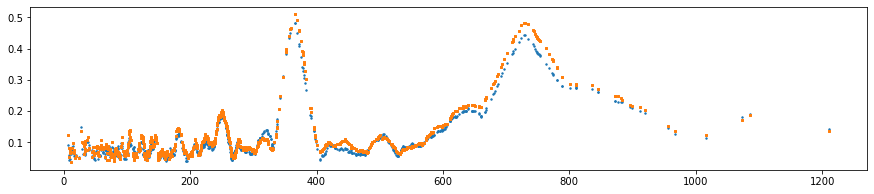

In [40]:
fig,ax=plt.subplots(1,1,figsize=(15,3))
ax.scatter(periods.keys(),periods.values(),s=2,label='baseline cadence')
ax.scatter(periodsRoll.keys(),periodsRoll.values(),marker='s',s=2,label='rolling cadence')
i=0
while i<totalObsLength:
    i+=365
    ax.axvline(i,color='r',alpha=0.4)
ax.legend()
ax.set_xlabel('Period in days')
ax.set_ylabel('Kuiper metric')

In [43]:
getResultDict=lambda bList:{float(p.runName.split('_')[1]):p.metricValues.data[0] for p in bList}
periods=getResultDict(bundleList)
periodsRoll=getResultDict(bundleListRoll)

Text(0, 0.5, 'Kuiper metric')

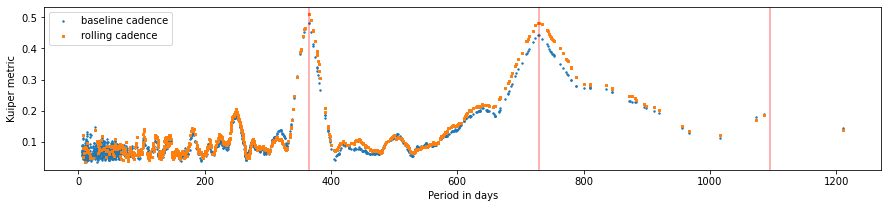

In [54]:
fig,ax=plt.subplots(1,1,figsize=(15,3))
ax.scatter(periods.keys(),periods.values(),s=2,label='baseline cadence')
ax.scatter(periodsRoll.keys(),periodsRoll.values(),marker='s',s=2,label='rolling cadence')
i=0
while i<1000:
    i+=365
    ax.axvline(i,color='r',alpha=0.4)
ax.legend()
ax.set_xlabel('Period in days')
ax.set_ylabel('Kuiper metric')

In [65]:
library[(library['_best_period']>363) & (library['_best_period']<366)]

,_best_period,unique_filts_,ymean_by_filt_,omega,theta,source_id,Expected,E-C,Type,Subtype,Nterms
8767,363.320783,"[zg, zr]","[15.93227611, 13.68123175]",0.017294,"[-0.07517592, 0.18589402, -0.08117412, 0.00831...",1857423207770947712,66.768935,-296.551849,MIRA_SR,Mira or Semiregular,1
24172,365.041582,"[zg, zi, zr]","[19.17289657, 14.2702665, 15.90361038]",0.017212,"[-0.13126388, 0.33628513, 0.20877936, 0.029690...",1825696353111405696,175.131007,-189.910575,MIRA_SR,Mira or Semiregular,1
25744,365.264206,"[zg, zr]","[17.60472603, 14.84644391]",0.017202,"[2.98208511, -3.26763955, -0.19071954, 0.27535...",4120593277452376320,125.649339,-239.614867,MIRA_SR,Mira or Semiregular,1
28581,363.628387,"[zg, zr]","[19.64426326, 16.76037417]",0.017279,"[0.09125793, -0.11841141, -0.24791349, 0.00613...",4172768677524483712,123.578237,-240.050150,MIRA_SR,Mira or Semiregular,1
30117,364.917715,"[zg, zr]","[16.21476829, 13.91622153]",0.017218,"[-0.0656095, 0.1203698, -0.09587754, -0.025788...",426221834218707712,117.428968,-247.488747,MIRA_SR,Mira or Semiregular,1
32772,365.463852,"[zg, zr]","[18.36971699, 15.39494084]",0.017192,"[-0.49553379, 0.60877885, -0.90767906, 0.34125...",4105393383794603520,120.951037,-244.512815,MIRA_SR,Mira or Semiregular,1
37295,364.081272,[zg],[14.25972315],0.017258,"[-0.0034027767, -0.0322781307, 0.0542732262, -...",232417967636580352,164.140157,-199.941115,MIRA_SR,Mira or Semiregular,3
45642,364.091716,"[zg, zr]","[20.03340811, 16.5717024]",0.017257,"[-0.22473639, 0.36265072, -0.10631535, 0.12760...",4160140644720855680,138.929872,-225.161844,MIRA_SR,Mira or Semiregular,3
46745,364.702209,"[zg, zr]","[15.42745509, 13.15775301]",0.017228,"[0.02718225, -0.0304509, 0.01912133, -0.128506...",1970374727317549056,83.400805,-281.301404,MIRA_SR,Mira or Semiregular,3
54103,365.485776,"[zg, zr]","[15.12387881, 13.00543561]",0.017191,"[-0.43703418, 0.82740143, 0.02899965, -0.29845...",4202115222665557120,136.849168,-228.636608,MIRA_SR,Mira or Semiregular,3


In [58]:
def determinePeriod(dataSlice,row,periodMin:float, periodMax:float,plot:bool)->float:
    """
    Determine period for a simulated light curve 'observed' with a given cadence. Credits for the simcode and 
    LCs to Kresimir Tisanic
    """
    uniqueFilts=[s.strip('z') for s in row['unique_filts_']]
    dataSlice=dataSlice[np.isin(dataSlice['filter'], uniqueFilts)]
    t=dataSlice['observationStartMJD']
    filts=dataSlice['filter']
    ext=ExtendedLS(fit_period=True,optimizer_kwds=dict(quiet=True),Nterms_base=row['Nterms'])
    ext.import_parameters(row)
    mags = ext.predict(t=t,filts=filts)
    magErrs=0.1*mags
    ext.optimizer.period_range = (periodMin, periodMax)
    p=ext.fit(t,mags,magErrs,filts).best_period
    if plot==True:
        fig=plt.figure(figsize=(5,5))
        subplot=fig.add_subplot(1,1,1)
        for f in uniqueFilts:
            subplot.scatter((t[np.where(filts==f)]%p)/p,mags[np.where(filts==f)],s=1,label=f)
        subplot.legend()
    return p

In [ ]:
dataSlice=bundleListPass[0].metricValues.data[~bundleListPass[0].metricValues.mask][0]
new_dt = np.dtype(dataSlice.dtype.descr + [('phasedObs', '<f8')])
dataSlice2 = np.zeros(dataSlice.shape, dtype=new_dt)
for c in dataSlice.dtype.names:
    dataSlice2[c]=dataSlice[c]

In [55]:
df=pd.DataFrame(columns=['periods','kuipMetricBaseline','kuipMetricRolling'],
                   data=zip(periods.keys(),periods.values(),periodsRoll.values()))
df.to_csv('pointKuipValuesPeriodsFromLibrary.csv',index=False)

In [59]:
metricPass = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth'])
bundleListPass=[]
bundleListPassRoll=[]

bundleListPass.append(maf.MetricBundle(metricPass, slicer, sql, runName='PassForAPoint'))
bdPass = maf.metricBundles.makeBundlesDictFromList(bundleListPass)
bgPass = maf.metricBundles.MetricBundleGroup(bdPass, conn, 
                                                outDir=outDir, resultsDb=resultsDb)
bgPass.runAll()

bundleListPassRoll.append(maf.MetricBundle(metricPass, slicer, sql, runName='PassForAPointRoll'))
bdPassRoll = maf.metricBundles.makeBundlesDictFromList(bundleListPassRoll)
bgPassRoll = maf.metricBundles.MetricBundleGroup(bdPassRoll, rollDb, 
                                                outDir=outDir, resultsDb=resultsDb)
bgPassRoll.runAll()

Querying database observations with no constraint for columns ['fieldRA', 'fieldDec', 'filter', 'fiveSigmaDepth', 'rotSkyPos', 'observationStartMJD'].
Found 2086980 visits
Running:  ['PassForAPoint_Pass_filter_observationStartMJD_fiveSigmaDepth_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with no constraint for columns ['fieldRA', 'fieldDec', 'filter', 'fiveSigmaDepth', 'rotSkyPos', 'observationStartMJD'].
Found 2088105 visits
Running:  ['PassForAPointRoll_Pass_filter_observationStartMJD_fiveSigmaDepth_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [60]:
def phasedCadence(period:float,dataSlice,mjdCol:str='observationStartMJD'):
    """
    Returns phase values for the timestamps of observatons
    """
    return (dataSlice[mjdCol]%float(period)/float(period))

In [61]:
def determinePeriod(dataSlice,row,periodMin:float, periodMax:float,plot:bool)->float:
    """
    Determine period for a simulated light curve 'observed' with a given cadence. Credits for the simcode and 
    LCs to Kresimir Tisanic
    """
    uniqueFilts=[s.strip('z') for s in row['unique_filts_']]
    dataSlice=dataSlice[np.isin(dataSlice['filter'], uniqueFilts)]
    t=dataSlice['observationStartMJD']
    filts=dataSlice['filter']
    ext=ExtendedLS(fit_period=True,optimizer_kwds=dict(quiet=True),Nterms_base=row['Nterms'])
    ext.import_parameters(row)
    mags = ext.predict(t=t,filts=filts)
    magErrs=0.1*mags
    ext.optimizer.period_range = (periodMin, periodMax)
    p=ext.fit(t,mags,magErrs,filts).best_period
    if plot==True:
        fig=plt.figure(figsize=(5,5))
        subplot=fig.add_subplot(1,1,1)
        for f in uniqueFilts:
            subplot.scatter((t[np.where(filts==f)]%p)/p,mags[np.where(filts==f)],s=1,label=f)
        subplot.legend()
    return p

dataSlice size is 851


/tmp/ipykernel_3861863/2799677610.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


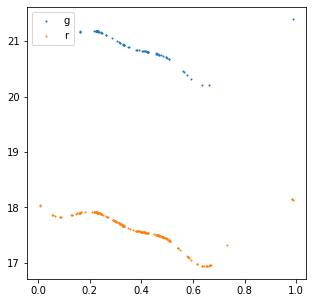

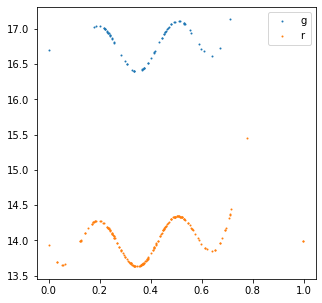

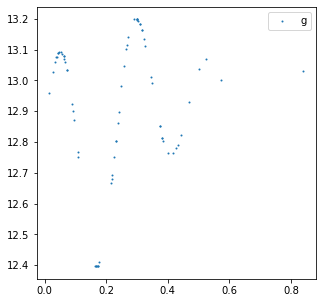

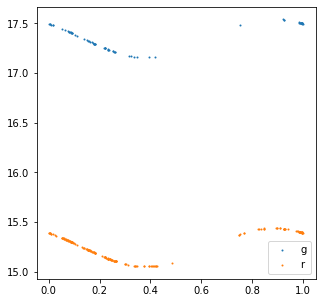

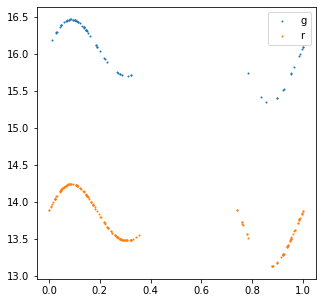

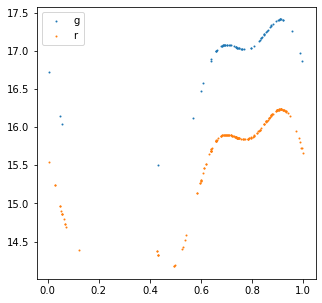

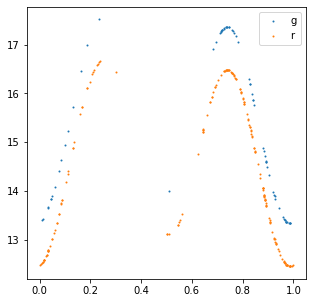

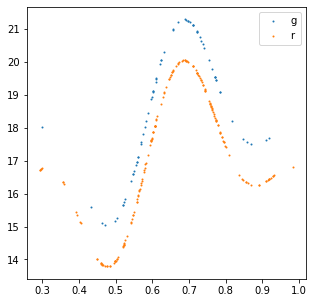

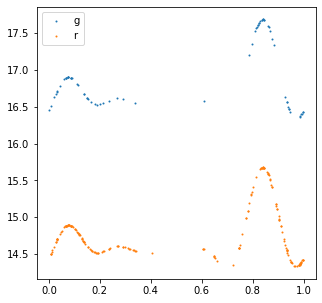

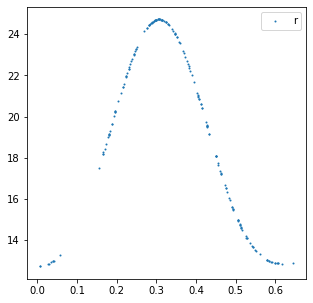

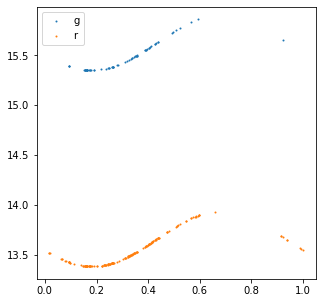

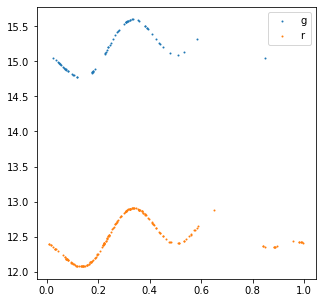

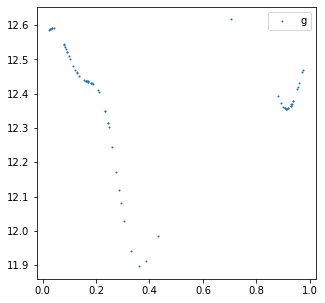

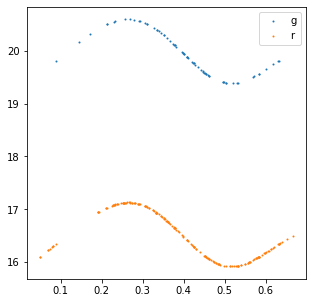

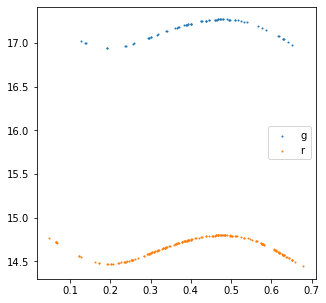

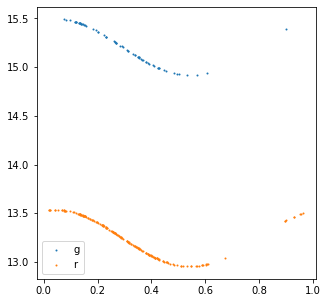

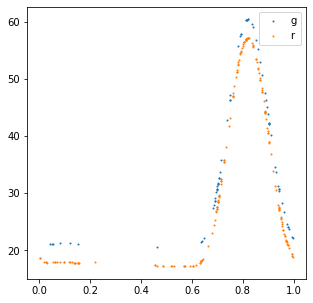

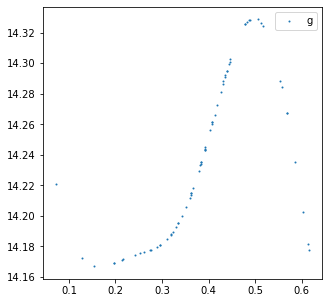

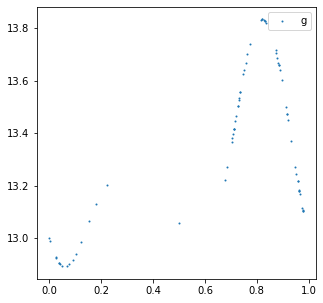

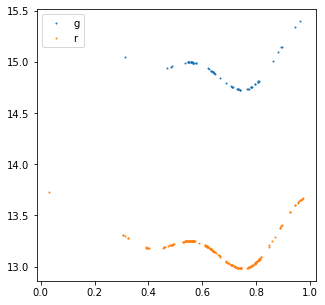

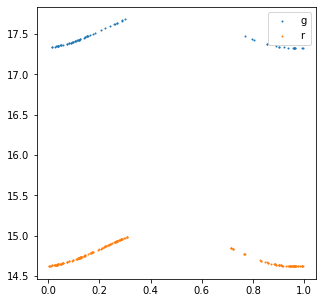

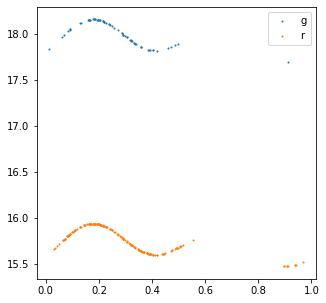

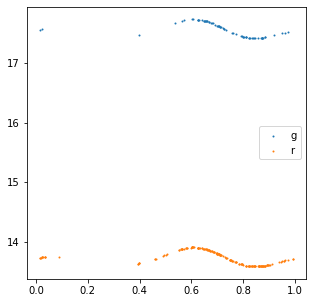

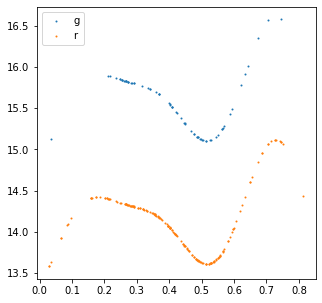

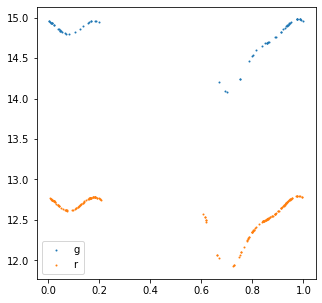

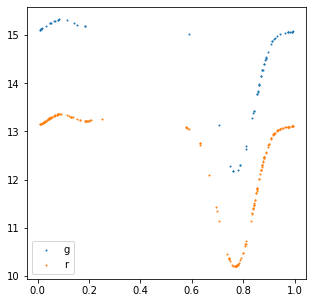

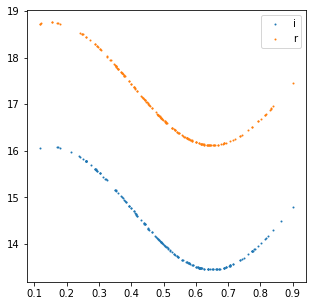

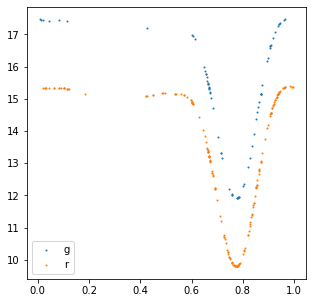

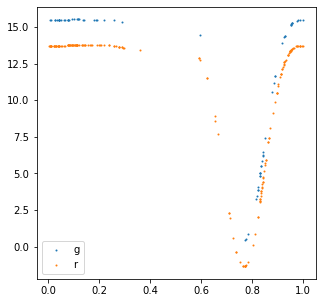

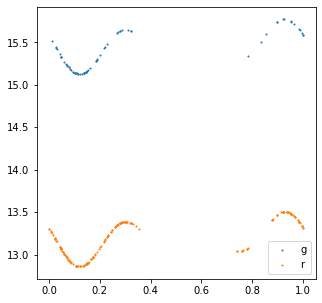

In [72]:
lib2=library[(library['_best_period']>350) & (library['_best_period']<370)]
dataSlice=bundleListPass[0].metricValues.data[~bundleListPass[0].metricValues.mask][0]
print('dataSlice size is '+str(len(dataSlice)))
libraryObsQuality=lib2.copy(deep=True)
libraryObsQuality=libraryObsQuality.sample(30)
libraryObsQuality['detectedPeriod']=None

periodMin=300
periodMax=500

libraryObsQuality['detectedPeriod']=libraryObsQuality.apply(lambda row:determinePeriod(dataSlice,row,
                                                                                       periodMin, periodMax,
                                                                                       plot=True), 
                                                                                       axis=1)
libraryObsQuality['diffPeriod']=libraryObsQuality['_best_period']-libraryObsQuality['detectedPeriod']
libraryObsQuality['relativeError']=libraryObsQuality['diffPeriod']*100/libraryObsQuality['_best_period']



In [70]:
libraryObsQuality

,_best_period,unique_filts_,ymean_by_filt_,omega,theta,source_id,Expected,E-C,Type,Subtype,Nterms,detectedPeriod,diffPeriod,relativeError
39430,353.186235,"[zg, zr]","[15.49850285, 13.23950079]",0.017790,"[-0.06409721, 0.19579473, -0.06724496, 0.04008...",4169734094128106880,133.484953,-219.701283,MIRA_SR,Mira or Semiregular,3,353.207974,-0.021739,-0.006155
439,351.806261,"[zg, zr]","[19.85703975, 16.43748304]",0.017860,"[-2.01120031, 0.14713536, 2.74473621, 0.251438...",4077399719023021440,120.918686,-230.887575,MIRA_SR,Mira or Semiregular,1,351.775485,0.030777,0.008748
47323,357.007694,"[zg, zr]","[18.28121478, 15.06526427]",0.017600,"[0.05744782, -0.17873831, 0.02768541, -0.07974...",4305591705060697856,118.005417,-239.002277,MIRA_SR,Mira or Semiregular,3,357.015619,-0.007926,-0.002220
89429,354.535261,"[zg, zr]","[17.92729762, 14.66538555]",0.017722,"[-0.17787762, -0.28852115, -0.19902826, -0.311...",463327224919363456,87.023943,-267.511318,MIRA_SR,Mira or Semiregular,5,354.514126,0.021135,0.005961
41456,354.394975,"[zg, zr]","[17.70674984, 14.95114227]",0.017729,"[0.93057859, -1.50349419, 0.71815876, -0.89444...",4145109225645385856,121.855783,-232.539192,MIRA_SR,Mira or Semiregular,3,354.376182,0.018793,0.005303
91033,359.220180,"[zg, zi, zr]","[18.83282553, 13.2826157, 15.79158421]",0.017491,"[0.00477995882, 0.0153059221, -0.0602178784, 0...",2029105213943024768,180.551506,-178.668673,MIRA_SR,Mira or Semiregular,5,359.227426,-0.007246,-0.002017
87302,352.597041,"[zg, zr]","[15.38499613, 13.63745689]",0.017820,"[-2.77464857, 5.01342064, -0.310976107, 0.6743...",4201146076203042432,123.167384,-229.429657,MIRA_SR,Mira or Semiregular,5,352.592624,0.004417,0.001253
46724,350.722768,"[zg, zr]","[16.0146784, 13.6374833]",0.017915,"[-0.06393046, 0.16525095, -0.10165608, 0.22628...",4161950200343419520,171.590630,-179.132137,MIRA_SR,Mira or Semiregular,3,350.691839,0.030929,0.008819
17219,368.354647,"[zg, zr]","[15.7750125, 13.94987556]",0.017057,"[0.01016747, 0.07485864, 0.11989553, -0.014843...",4287646236499761024,119.524947,-248.829700,MIRA_SR,Mira or Semiregular,1,368.350696,0.003951,0.001073
54103,365.485776,"[zg, zr]","[15.12387881, 13.00543561]",0.017191,"[-0.43703418, 0.82740143, 0.02899965, -0.29845...",4202115222665557120,136.849168,-228.636608,MIRA_SR,Mira or Semiregular,3,365.468311,0.017464,0.004778


dataSlice size is 851


/tmp/ipykernel_3861863/2799677610.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


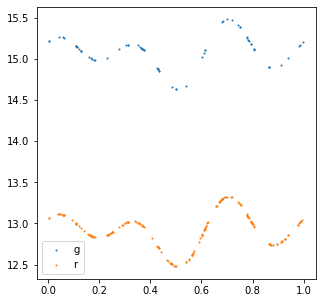

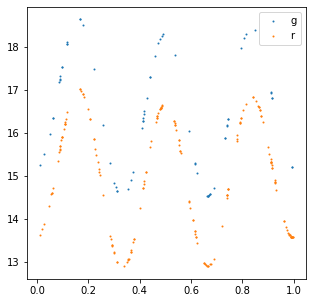

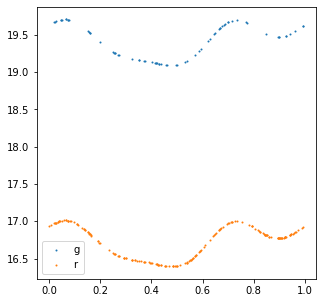

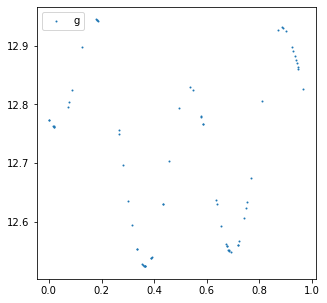

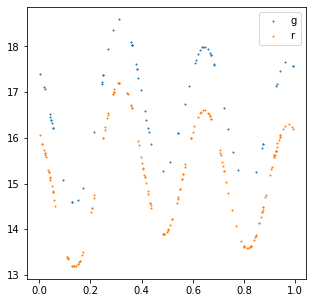

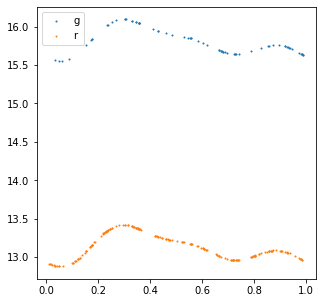

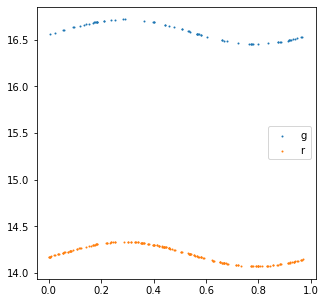

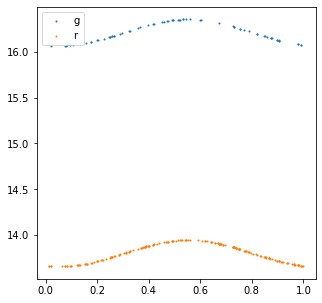

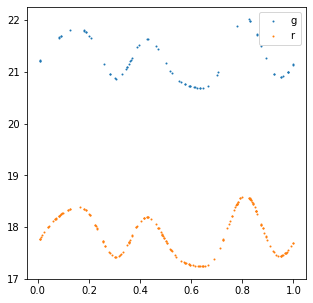

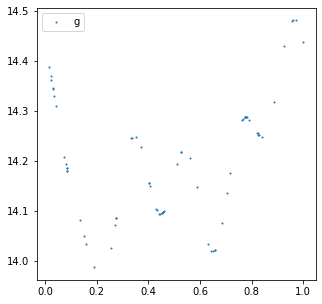

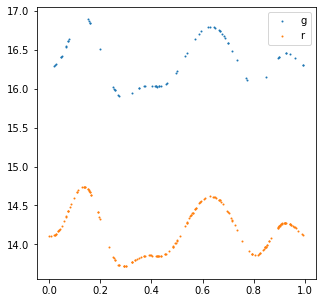

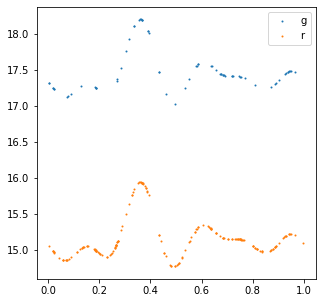

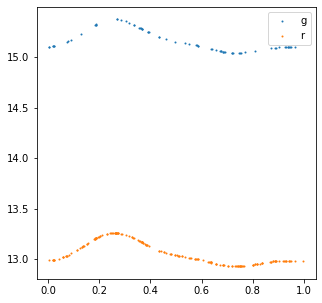

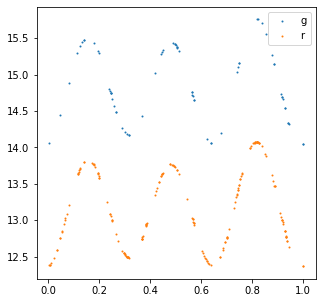

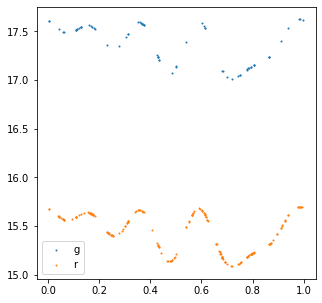

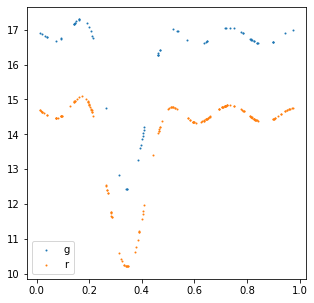

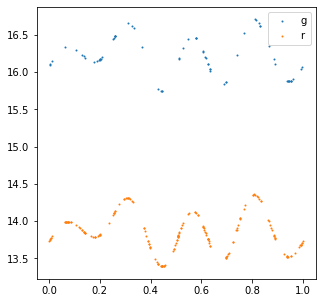

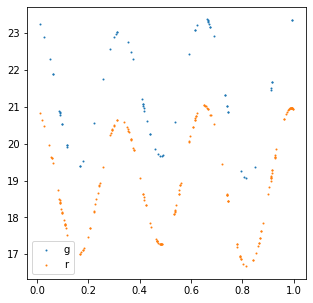

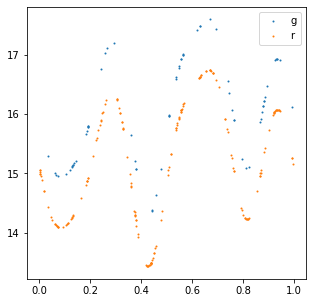

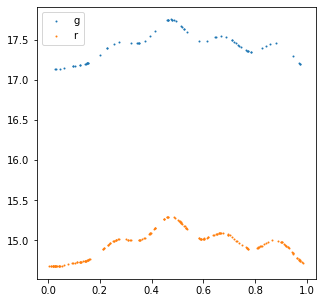

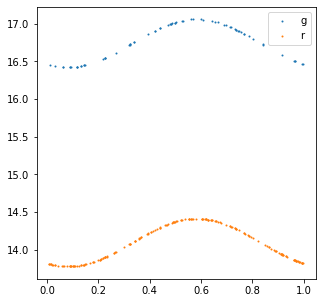

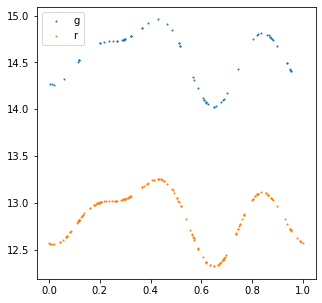

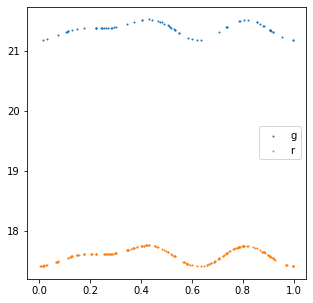

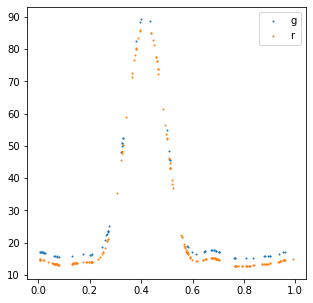

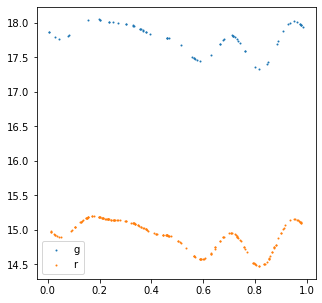

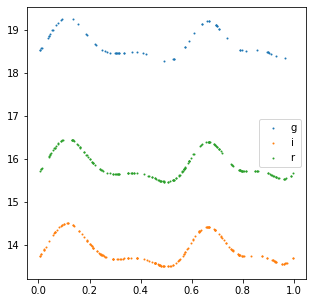

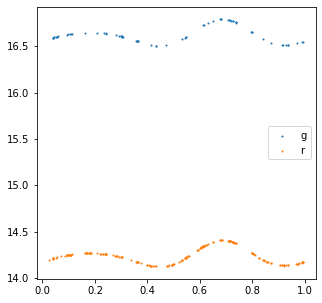

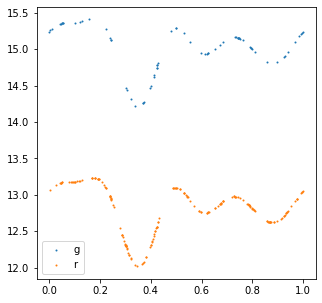

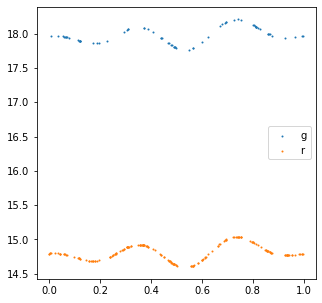

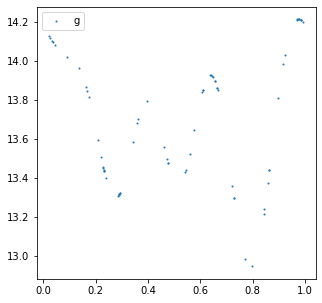

In [73]:
lib3=library[(library['_best_period']>470) & (library['_best_period']<480)]
dataSlice=bundleListPass[0].metricValues.data[~bundleListPass[0].metricValues.mask][0]
print('dataSlice size is '+str(len(dataSlice)))
libraryObsQuality3=lib3.copy(deep=True)
libraryObsQuality3=libraryObsQuality3.sample(30)
libraryObsQuality3['detectedPeriod']=None

periodMin=300
periodMax=600

libraryObsQuality3['detectedPeriod']=libraryObsQuality3.apply(lambda row:determinePeriod(dataSlice,row,
                                                                                       periodMin, periodMax,
                                                                                       plot=True), 
                                                                                       axis=1)
libraryObsQuality3['diffPeriod']=libraryObsQuality3['_best_period']-libraryObsQuality3['detectedPeriod']
libraryObsQuality3['relativeError']=libraryObsQuality3['diffPeriod']*100/libraryObsQuality3['_best_period']



In [74]:
libraryObsQuality3

,_best_period,unique_filts_,ymean_by_filt_,omega,theta,source_id,Expected,E-C,Type,Subtype,Nterms,detectedPeriod,diffPeriod,relativeError
54474,472.941561,"[zg, zr]","[15.13424548, 12.98041968]",0.013285,"[-0.0635489, -0.06807739, 0.08986696, 0.094178...",4206095218571412224,165.813930,-307.127631,MIRA_SR,Mira or Semiregular,3,472.890483,0.051078,0.010800
52513,471.733829,"[zg, zr]","[15.78475299, 14.15494181]",0.013319,"[0.83554524, 0.06974943, 0.30378578, 0.0850438...",4212439636846318336,157.249847,-314.483982,MIRA_SR,Mira or Semiregular,3,471.788116,-0.054287,-0.011508
38181,479.183156,"[zg, zr]","[19.47897029, 16.78186756]",0.013112,"[-0.05626429, -0.10937706, 0.23606238, 0.09552...",4171107899562918784,147.407816,-331.775340,MIRA_SR,Mira or Semiregular,3,479.235841,-0.052685,-0.010995
36742,470.818729,[zg],[12.80961678],0.013345,"[-0.0566351976, 0.017060399, 0.106168119, 0.02...",1960961846929820416,151.459916,-319.358813,MIRA_SR,Mira or Semiregular,3,470.820071,-0.001342,-0.000285
43692,475.654756,"[zg, zr]","[16.13341868, 14.74677172]",0.013210,"[0.38709189, 0.14339885, -0.35414559, -0.23876...",4147005608267359872,158.674283,-316.980473,MIRA_SR,Mira or Semiregular,3,475.606970,0.047786,0.010046
56006,474.490751,"[zg, zr]","[15.72491793, 13.04957314]",0.013242,"[0.07366459, 0.12989855, -0.13174907, -0.09149...",4518782650311849600,86.469919,-388.020833,MIRA_SR,Mira or Semiregular,3,474.491916,-0.001165,-0.000245
24607,477.349632,"[zg, zr]","[16.61238996, 14.22818744]",0.013163,"[-0.02504049, 0.12804226, -0.03203208, 0.01916...",4311363904926460672,134.161482,-343.188150,MIRA_SR,Mira or Semiregular,1,477.351952,-0.002320,-0.000486
33008,479.909637,"[zg, zr]","[16.21436849, 13.80707987]",0.013092,"[-0.0046731, -0.03689042, -0.13920986, 0.04845...",524363043825459456,103.593506,-376.316132,MIRA_SR,Mira or Semiregular,1,479.867113,0.042525,0.008861
80329,479.501021,"[zg, zr]","[21.12049256, 17.67040061]",0.013104,"[0.18495933, 0.08369229, 0.21684497, -0.080322...",4269834457368051584,163.762768,-315.738253,MIRA_SR,Mira or Semiregular,5,479.488150,0.012870,0.002684
67205,474.093692,[zg],[14.1977744],0.013253,"[-0.00611239925, -0.058953846, 0.0917866611, -...",3132647887554048384,127.308304,-346.785387,MIRA_SR,Mira or Semiregular,5,474.132787,-0.039095,-0.008246


In [76]:
libraryObsQuality3['relativeError'].abs().median()

0.007791542865159666

In [77]:
libraryObsQuality['relativeError'].abs().median()

0.00406057553123519

In [78]:
library.head()

,_best_period,unique_filts_,ymean_by_filt_,omega,theta,source_id,Expected,E-C,Type,Subtype,Nterms
0,0.236720,"[zg, zi]","[21.48676699, 18.7078934]",26.542730,"[0.00513976, 0.21720297, 0.09356054, -0.013740...",2163969347391329408,0.538431,0.301711,RR,fundamental mode,1
1,113.361706,"[zg, zr]","[19.47585281, 15.9530296]",0.055426,"[0.07714091, -0.18145219, 0.02491756, -0.07214...",4068080700794544000,146.171133,32.809427,MIRA_SR,Mira or Semiregular,1
2,70.461748,"[zg, zr]","[19.31496061, 15.94673461]",0.089172,"[0.19851974, -0.20921135, -0.20103493, -0.0867...",4068074069364824064,72.297616,1.835867,MIRA_SR,Mira or Semiregular,1
3,0.664768,"[zi, zr]","[19.2131386, 20.28765675]",9.451700,"[0.04120764, -0.01789527, 0.21846307, 0.025405...",2167254550695165056,0.698121,0.033353,RR,fundamental mode,1
4,0.555125,"[zg, zr]","[16.75914552, 16.15382336]",11.318498,"[0.06246225, 0.35994573, -0.28540377, -0.01781...",146608674289675264,0.555147,0.000021,RR,fundamental mode,1


In [79]:
lib3=library[library['Type']=='RR']
dataSlice=bundleListPass[0].metricValues.data[~bundleListPass[0].metricValues.mask][0]
print('dataSlice size is '+str(len(dataSlice)))
libraryObsQuality3=lib3.copy(deep=True)
libraryObsQuality3=libraryObsQuality3.sample(30)
libraryObsQuality3['detectedPeriod']=None
libraryObsQuality3['']

dataSlice size is 851


,_best_period,unique_filts_,ymean_by_filt_,omega,theta,source_id,Expected,E-C,Type,Subtype,Nterms,detectedPeriod
86840,0.666737,"[zg, zr]","[20.15395847, 19.79287165]",9.423790,"[0.09724005, 0.22350247, -0.13322863, 0.029400...",1917535501316047488,0.666743,6.297076e-06,RR,fundamental mode,5,None
67883,0.574443,"[zg, zr]","[16.08831925, 15.60675462]",10.937881,"[0.01774853, 0.19971819, -0.17232821, 0.058117...",4378288909926262656,0.574428,-1.443394e-05,RR,fundamental mode,5,None
48791,0.530420,"[zg, zr]","[17.50470692, 16.85030694]",11.845686,"[0.05694197, 0.36497375, -0.04343555, -0.09067...",4294504955696835200,0.472914,-5.750567e-02,RR,fundamental mode,3,None
63350,0.267838,"[zg, zi, zr]","[16.69660291, 15.29712918, 15.8163522]",23.458905,"[0.01368505, 0.14165853, -0.09055643, -0.00993...",439785551395876352,0.267843,4.916653e-06,RR,first-overtone,3,None
97366,0.611366,"[zg, zi, zr]","[16.15322591, 15.93755514, 15.92058672]",10.277293,"[0.00100843, -0.17937223, 0.12387135, 0.025473...",1382923394219597824,0.611372,6.417431e-06,RR,fundamental mode,5,None
90499,0.698599,"[zg, zr]","[17.66058803, 16.87438068]",8.993983,"[0.16085066, -0.24275583, -0.01108863, -0.0889...",4123051201333163136,0.698618,1.904801e-05,RR,fundamental mode,5,None
3637,0.646611,"[zg, zr]","[16.88648181, 16.64395461]",9.717109,"[0.02501903, 0.28659573, -0.04436334, 0.008424...",4230021519266448896,0.646613,2.916301e-06,RR,fundamental mode,1,None
84148,0.420443,"[zg, zr]","[17.85189497, 17.46185468]",14.944190,"[0.08057245, 0.07167748, 0.34988487, 0.0946925...",4238757654554532736,0.420451,7.557369e-06,RR,fundamental mode,5,None
12691,0.303283,"[zg, zr]","[16.62191165, 16.41361877]",20.717266,"[0.00569325, 0.10689676, 0.18353094, -0.010744...",4236380407329322880,0.303281,-1.458763e-06,RR,first-overtone,1,None
52402,0.779523,"[zg, zi, zr]","[18.19078123, 17.82811391, 17.95697816]",8.060291,"[0.00621818, 0.01494324, 0.12904373, 0.0408216...",4567326123027027328,0.779539,1.570642e-05,RR,fundamental mode,3,None


dataSlice size is 851


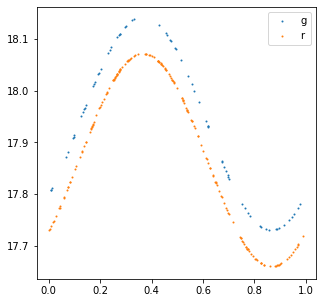

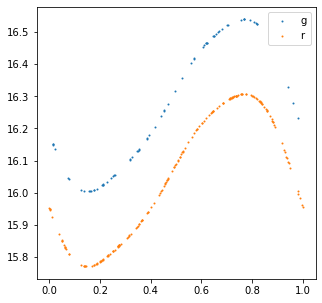

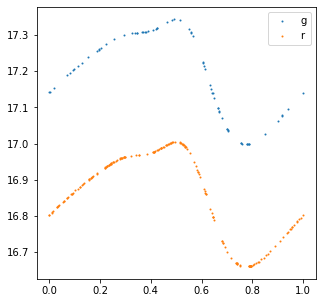

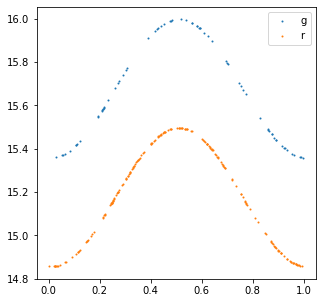

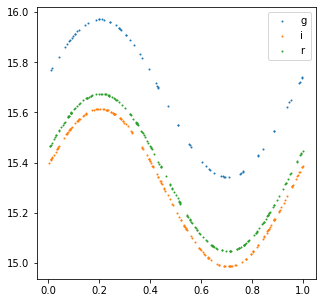

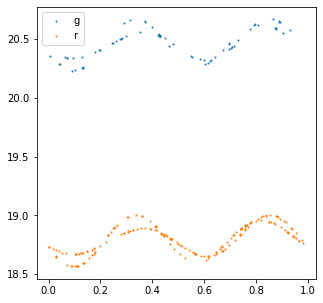

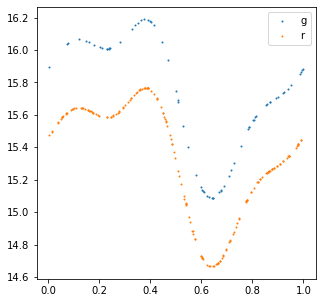

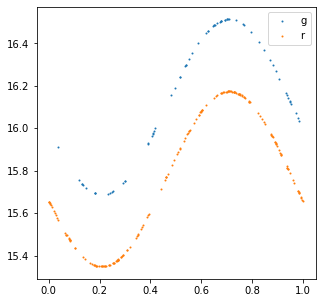

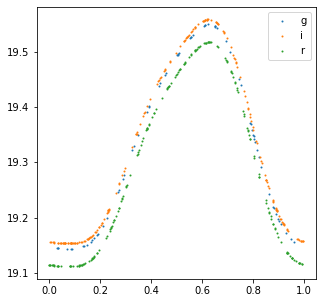

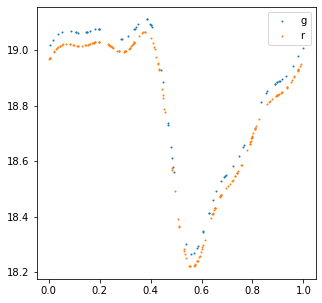

In [80]:
lib3=library[library['Type']=='RR']
dataSlice=bundleListPass[0].metricValues.data[~bundleListPass[0].metricValues.mask][0]
print('dataSlice size is '+str(len(dataSlice)))
libraryObsQuality3=lib3.copy(deep=True)
libraryObsQuality3=libraryObsQuality3.sample(10)
libraryObsQuality3['detectedPeriod']=None

periodMin=0.2
periodMax=1

libraryObsQuality3['detectedPeriod']=libraryObsQuality3.apply(lambda row:determinePeriod(dataSlice,row,
                                                                                       periodMin, periodMax,
                                                                                       plot=True), 
                                                                                       axis=1)
libraryObsQuality3['diffPeriod']=libraryObsQuality3['_best_period']-libraryObsQuality3['detectedPeriod']
libraryObsQuality3['relativeError']=libraryObsQuality3['diffPeriod']*100/libraryObsQuality3['_best_period']



In [ ]:
lib3=library[(library['_best_period']>470) & (library['_best_period']<480)]
dataSlice=bundleListPass[0].metricValues.data[~bundleListPass[0].metricValues.mask][0]
print('dataSlice size is '+str(len(dataSlice)))
libraryObsQuality3=lib3.copy(deep=True)
libraryObsQuality3=libraryObsQuality3.sample(30)
libraryObsQuality3['detectedPeriod']=None

periodMin=300
periodMax=600

libraryObsQuality3['detectedPeriod']=libraryObsQuality3.apply(lambda row:determinePeriod(dataSlice,row,
                                                                                       periodMin, periodMax,
                                                                                       plot=True), 
                                                                                       axis=1)
libraryObsQuality3['diffPeriod']=libraryObsQuality3['_best_period']-libraryObsQuality3['detectedPeriod']
libraryObsQuality3['relativeError']=libraryObsQuality3['diffPeriod']*100/libraryObsQuality3['_best_period']



In [62]:
dataSlice=bundleListPass[0].metricValues.data[~bundleListPass[0].metricValues.mask][0]
print('dataSlice size is '+str(len(dataSlice)))
libraryObsQuality=libCut.copy(deep=True)
libraryObsQuality['detectedPeriod']=None

libraryObsQuality['detectedPeriod']=libraryObsQuality.progress_apply(lambda row:determinePeriod(dataSlice,row,
                                                                                       periodMin, periodMax,
                                                                                       plot=plot), 
                                                                                       axis=1)
libraryObsQuality['diffPeriod']=libraryObsQuality['_best_period']-libraryObsQuality['detectedPeriod']
libraryObsQuality['relativeError']=libraryObsQuality['diffPeriod']*100/libraryObsQuality['_best_period']

dataSlice size is 851


AttributeError: 'DataFrame' object has no attribute 'progress_apply'

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,3))
ax.scatter(libraryObsQuality['_best_period'],libraryObsQuality['relativeError'],s=2,label='baseline cadence')
#ax.scatter(periodsRoll.keys(),periodsRoll.values(),marker='s',s=2,label='rolling cadence')
i=0
while i<totalObsLength:
    i+=365
    ax.axvline(i,color='r',alpha=0.4)
ax.legend()
ax.set_xlabel('Period in days')
ax.set_ylabel('Kuiper metric')

In [20]:
import random

/tmp/ipykernel_3811572/3228605529.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


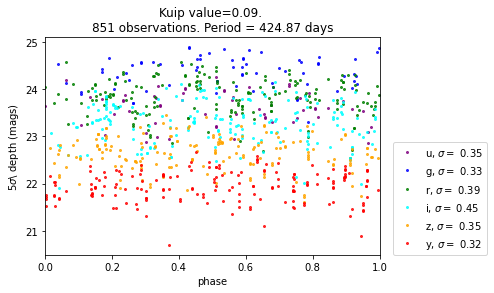

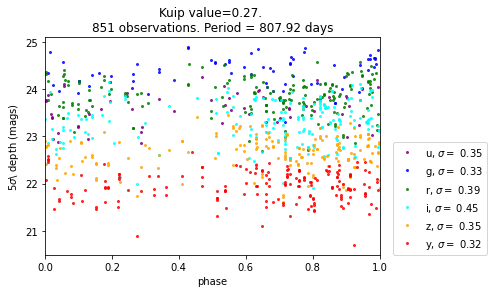

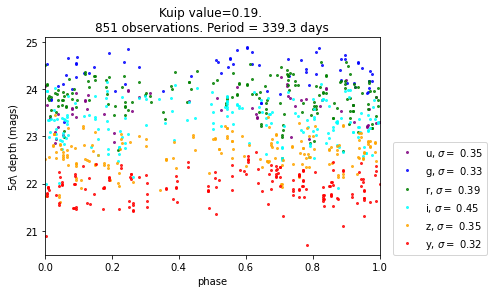

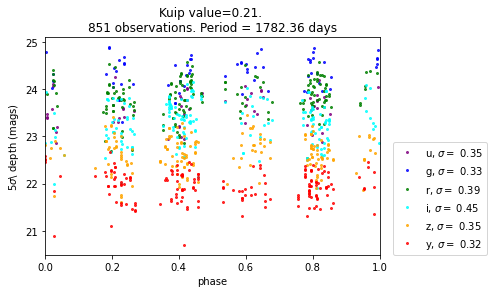

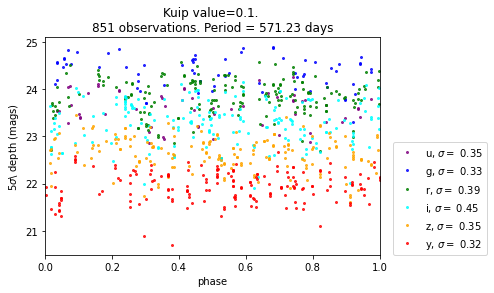

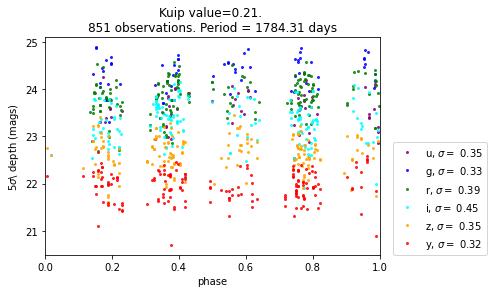

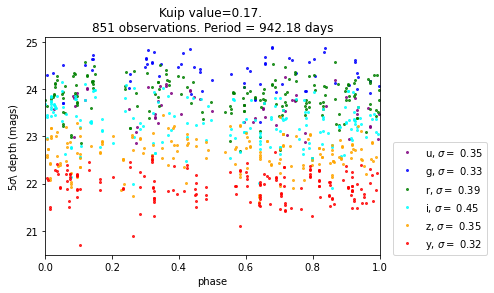

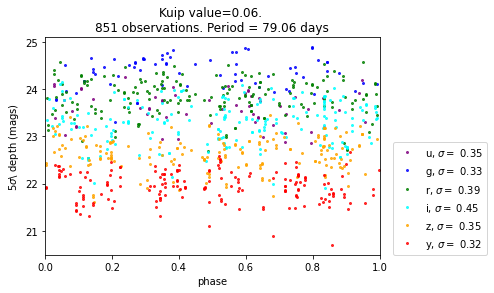

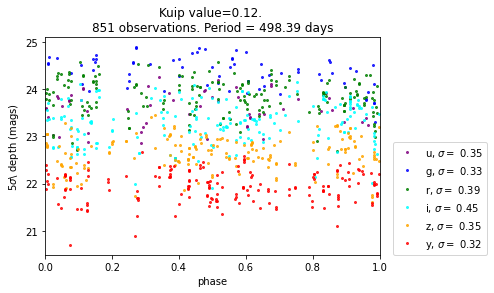

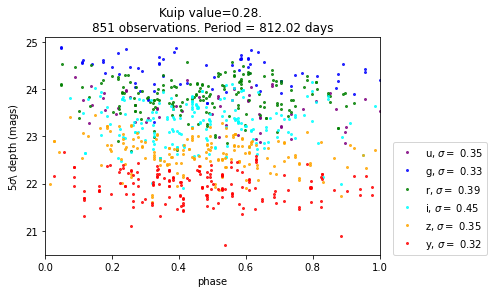

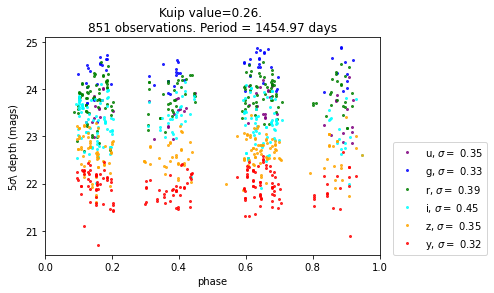

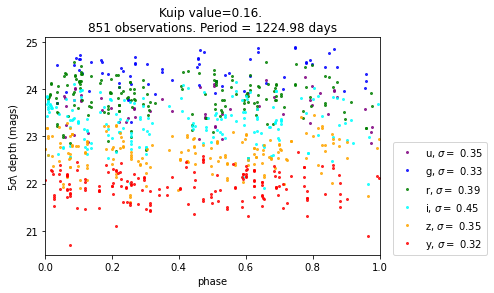

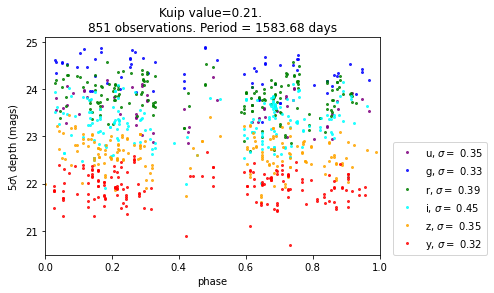

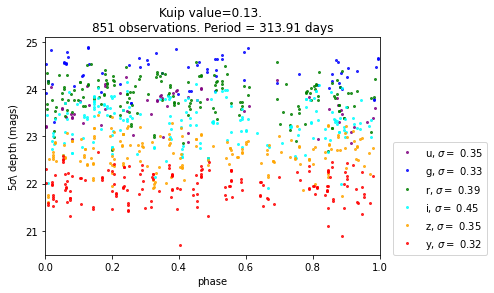

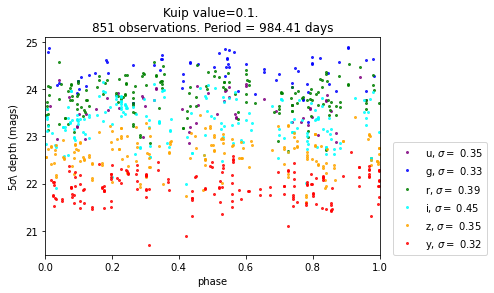

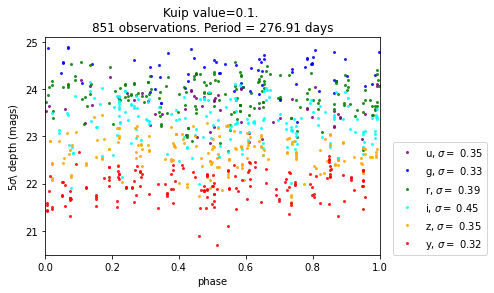

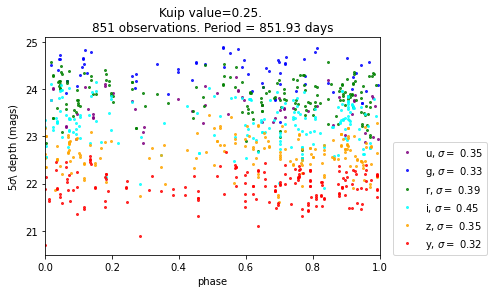

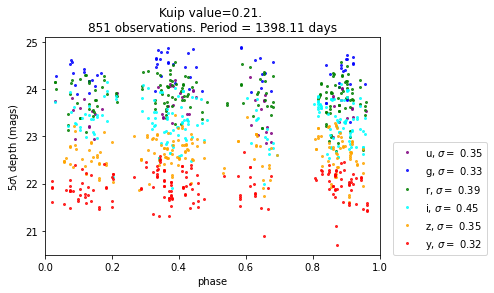

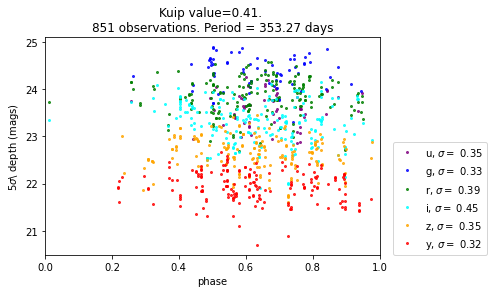

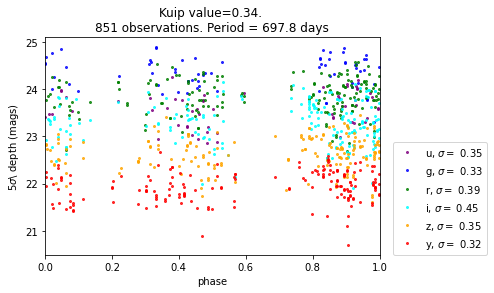

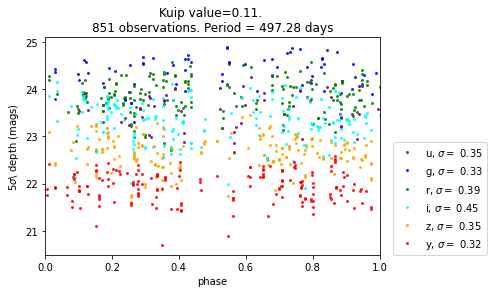

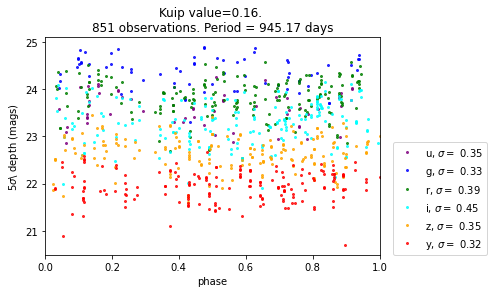

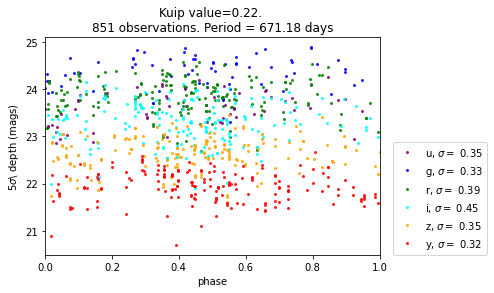

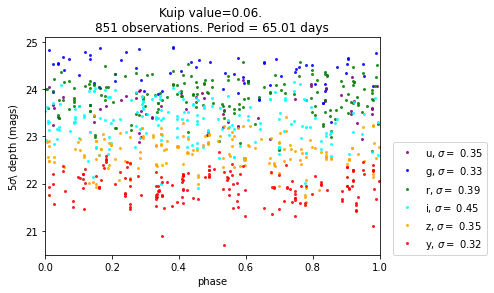

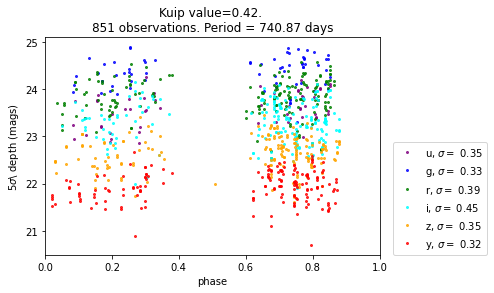

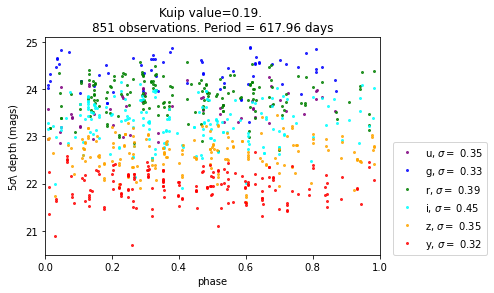

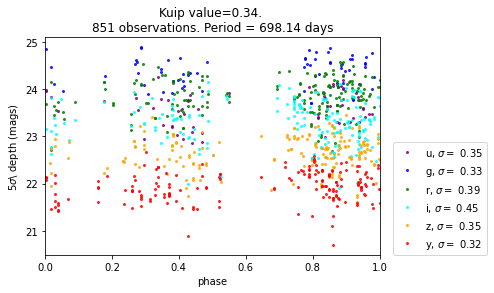

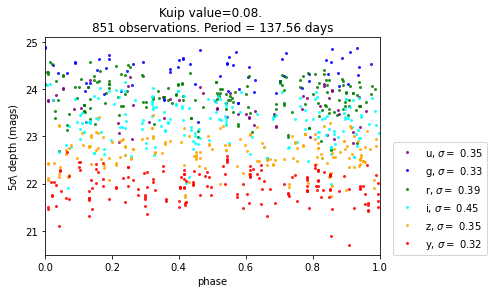

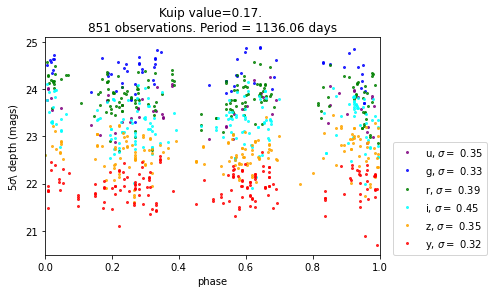

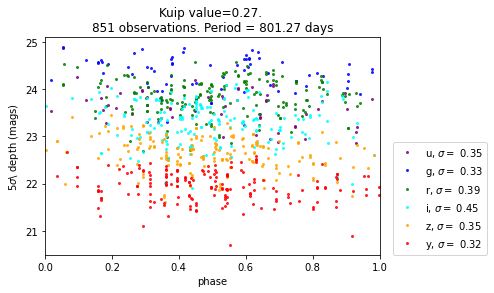

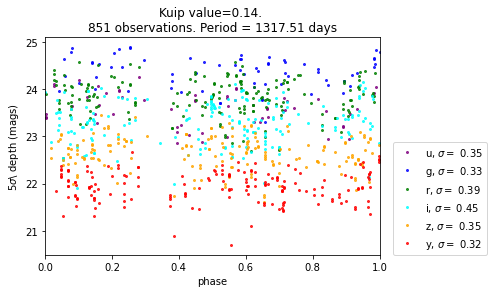

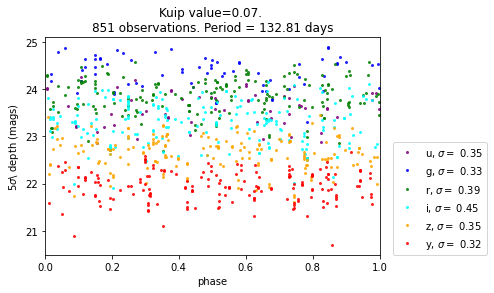

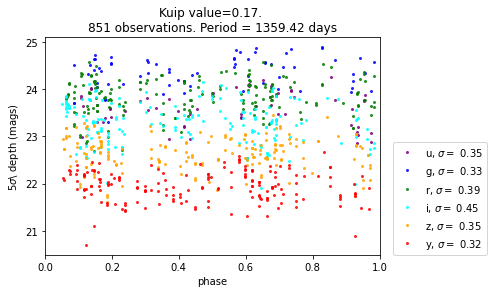

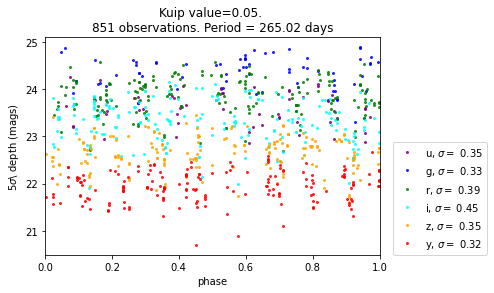

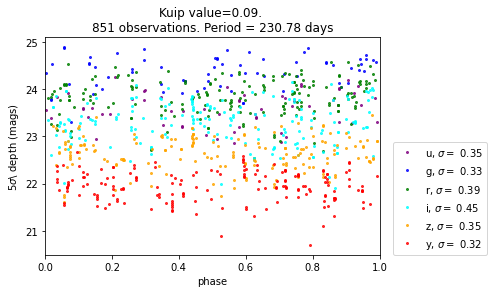

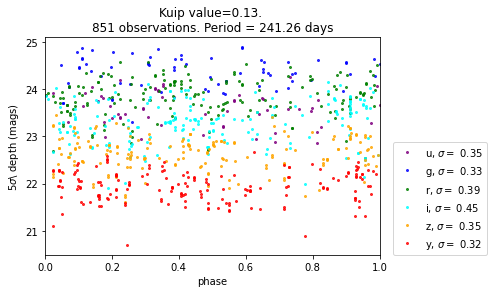

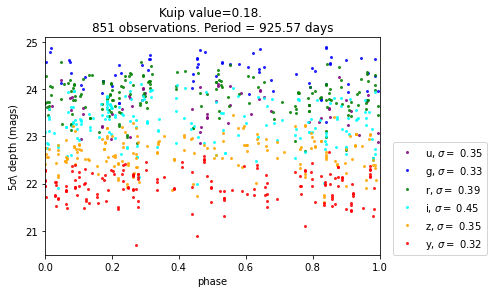

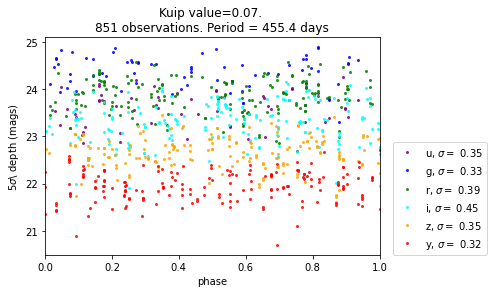

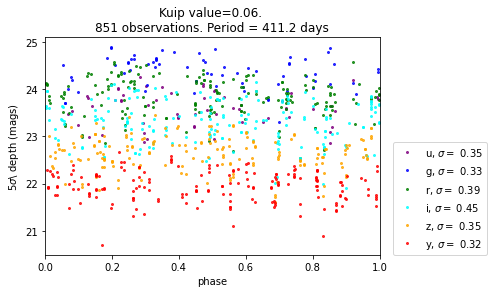

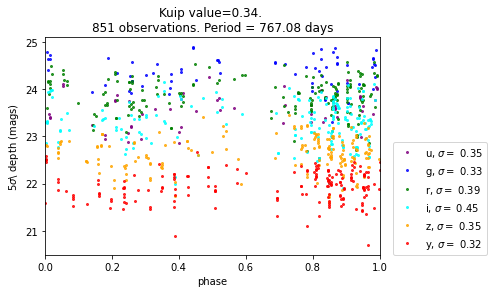

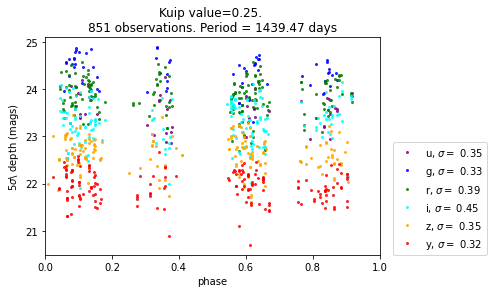

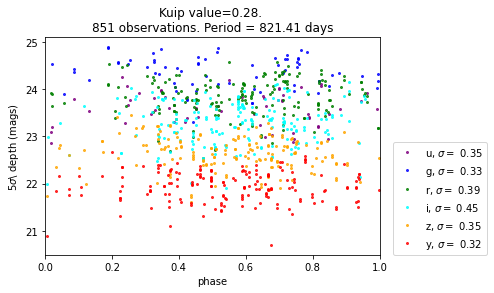

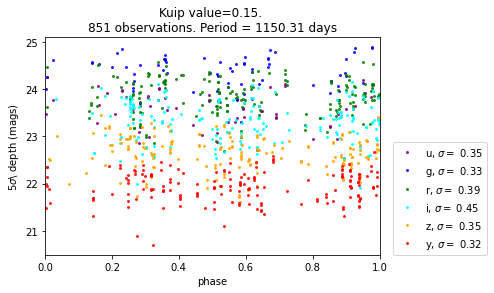

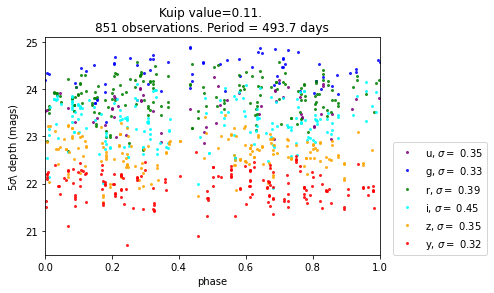

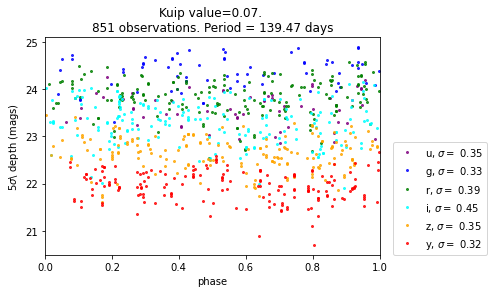

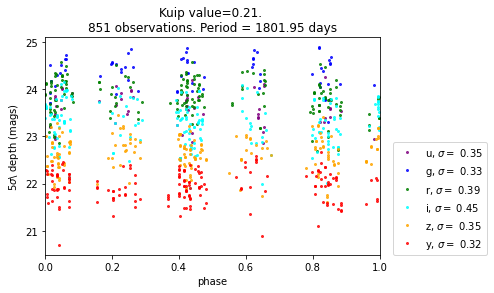

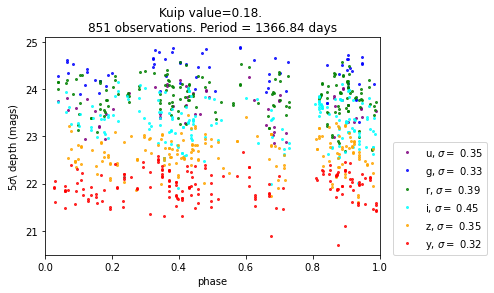

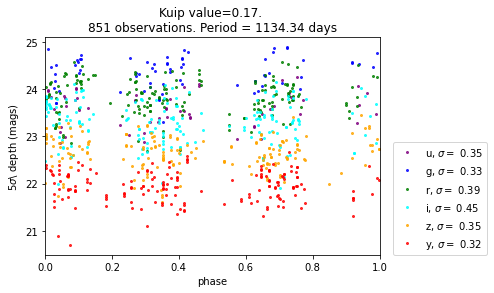

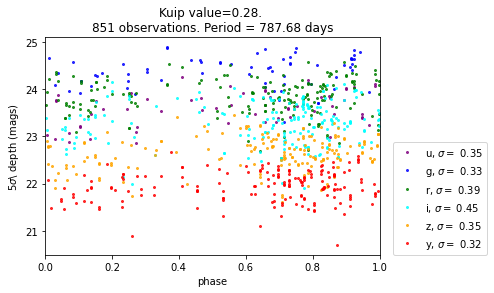

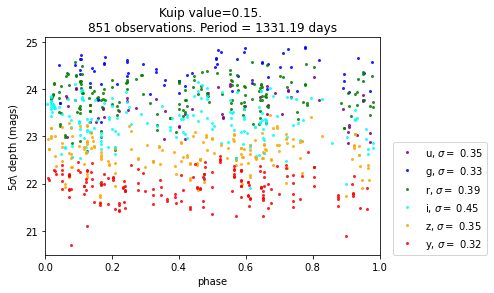

In [25]:
# Plot phased observations 
dataSlice=bundleListPass[0].metricValues.data[~bundleListPass[0].metricValues.mask][0]
new_dt = np.dtype(dataSlice.dtype.descr + [('phasedObs', '<f8')])
dataSlice2 = np.zeros(dataSlice.shape, dtype=new_dt)
for c in dataSlice.dtype.names:
    dataSlice2[c]=dataSlice[c]
    

periodsSample=dict(random.sample(list(periods.items()),50))

for period,kuipVal in periodsSample.items():
    dataSlice2['phasedObs']=phasedCadence(period=period,dataSlice=dataSlice)

    # Let's plot up what the 5-sigma depth looks like
    plt.figure()
    # Give each filter it's own color
    f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}
    for fn in f2c:
        in_filt = np.where(dataSlice2['filter'] == fn)[0]
        plt.plot(dataSlice2['phasedObs'][in_filt],
                 dataSlice2['fiveSigmaDepth'][in_filt], 'o',
                 color=f2c[fn],
                 label=fn+r', $\sigma=$ %.2f' % (np.std(dataSlice2['fiveSigmaDepth'][in_filt])),
                 alpha=0.8,
                 markersize=2)
    plt.xlabel('phase')
    plt.ylabel(r'5$\sigma$\ depth (mags)')
    plt.xlim(0,1)
    plt.legend(loc=(1.04,0))
    plt.title('Kuip value='+str(round(kuipVal,2))+'. \n'+
              str(len(dataSlice))+' observations. Period = '+str(period)+' days')